In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

In [2]:
# Download  stopwords (Run only 1 time)
# nltk.download('stopwords')

In [3]:
# Loading dataset
df = pd.read_csv("customer_feedback_data.csv")

In [4]:
# Creating a Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','',text)
    text = re.sub(r'\s+','',text).strip()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [5]:
# Apply Cleaning to the whole dataset 
df["cleaned_feedback"] = df["Feedback"].apply(clean_text)

In [6]:
# Add word_count column 
df["word_count"] = df["cleaned_feedback"].apply(lambda x : len(x.split()))

In [7]:
# Save Cleaned data
df.to_csv("cleaned_customer_feedback.csv",index=False)

In [8]:
df.head()

,Customer_ID,Product,Feedback,Rating,Sentiment,cleaned_feedback,word_count
0,1,Customer Support,Great experience overall!,2,Positive,greatexperienceoverall,1
1,2,Payment,Needs improvement in delivery time.,3,Positive,needsimprovementindeliverytime,1
2,3,Delivery,Customer support was very helpful.,4,Neutral,customersupportwasveryhelpful,1
3,4,Payment,The service was quick but could be better.,5,Negative,theservicewasquickbutcouldbebetter,1
4,5,Payment,The service was quick but could be better.,1,Positive,theservicewasquickbutcouldbebetter,1


In [9]:
# To check dataset shape
df.shape

(200, 7)

In [51]:
df["Product"].unique()

array(['Customer Support', 'Payment', 'Delivery', 'Website',
       'Product Quality', 'Mobile App'], dtype=object)

In [10]:
# To check column names
df.columns

Index(['Customer_ID', 'Product', 'Feedback', 'Rating', 'Sentiment',
       'cleaned_feedback', 'word_count'],
      dtype='object')

In [11]:
# summary for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_ID       200 non-null    int64 
 1   Product           200 non-null    object
 2   Feedback          200 non-null    object
 3   Rating            200 non-null    int64 
 4   Sentiment         200 non-null    object
 5   cleaned_feedback  200 non-null    object
 6   word_count        200 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 11.1+ KB


In [12]:
df.describe()

,Customer_ID,Rating,word_count
count,200.000000,200.000000,200.0
mean,100.500000,3.110000,1.0
std,57.879185,1.462393,0.0
min,1.000000,1.000000,1.0
25%,50.750000,2.000000,1.0
50%,100.500000,3.000000,1.0
75%,150.250000,4.000000,1.0
max,200.000000,5.000000,1.0


In [13]:
# Checking missing values
df.isnull().sum()

Customer_ID         0
Product             0
Feedback            0
Rating              0
Sentiment           0
cleaned_feedback    0
word_count          0
dtype: int64

In [14]:
# removing duplicated rows 
df.duplicated().sum()

0

In [15]:
#!pip install wordcloud

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter

### Rating Distribution

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12776\4032601211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Rating",data=df,palette="viridis")


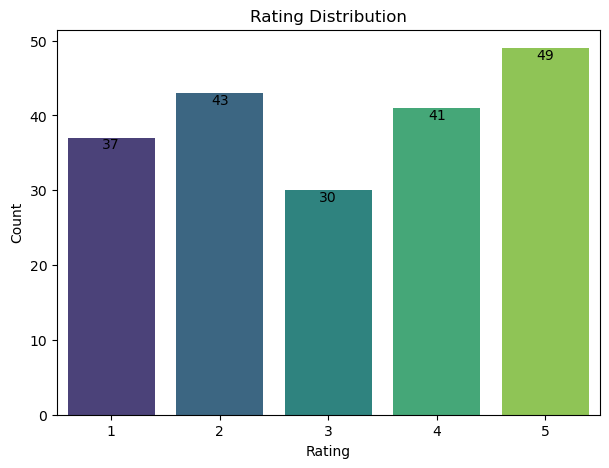

In [18]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="Rating",data=df,palette="viridis")
for bar in ax.patches:
    ax.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',va='top'
    )
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Insight: Rating DistributionMost customers gave a rating of 5, which means a lot of people were fully satisfied. But the next highest rating is 2, 
which shows that many customers were also unhappy. So the overall experience is very mixed —
people either loved it or didn’t like it at all.4).


### Sentiment Distribution

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12776\530497354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Sentiment",data=df,palette="Set2")


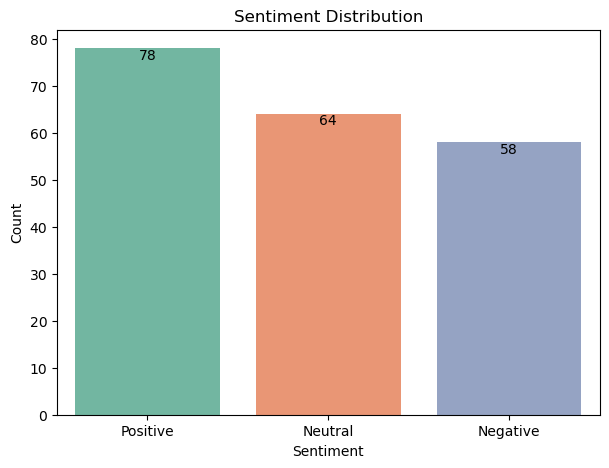

In [20]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="Sentiment",data=df,palette="Set2")
for bar in ax.patches:
    ax.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha="center",va="top"
    )
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Insights : Sentiment Distribution
The highest sentiment count is positive, which means many customers shared good experiences. But still, 
the negative ones are strong enough to highlight that some areas really need improvement.

### Wordcloud For Feedback

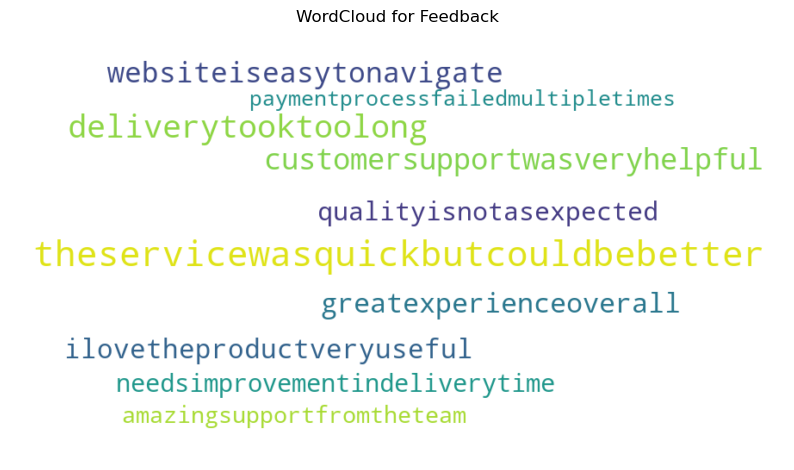

In [53]:
all_words = " ".join(df["cleaned_feedback"])
wordcloud = WordCloud(
    width = 900,
    height = 500,
    background_color = "white"
).generate(all_words)
plt.figure(figsize=(10,6))
plt.title("WordCloud for Feedback")
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Insights : WordCloud Distribution
The most common thing customers talked about was delivery delay. Many people complained that the delivery took too long. 
There are also several comments about product quality not being as expected. A few people mentioned payment failures,
but not as frequently. On the positive side, customers appreciated the support team and some users said they genuinely liked the product.

### Top 10 Most Frequent Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import squarify

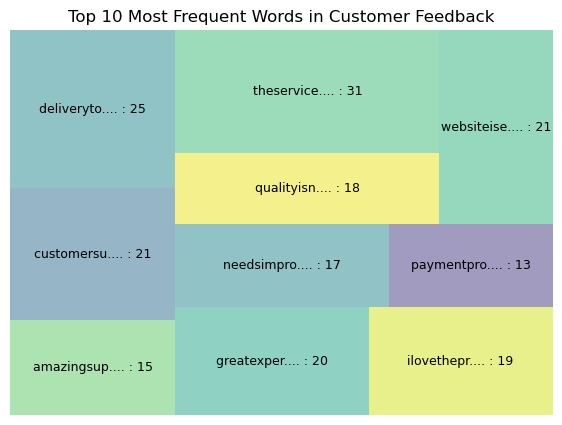

In [79]:
cv = CountVectorizer(max_features=10)
word_matrix= cv.fit_transform(df["cleaned_feedback"])
word_counts= word_matrix.sum(axis=0)
words = cv.get_feature_names_out()
counts= word_counts.A1
plt.figure(figsize=(7,5))
short_words = [w[:10]+'....' if len(w)>10 else w for w in words]
labels=[f"{sw} : {c}" for sw, c in zip(short_words,counts)]
squarify.plot(
    sizes = counts,
    label = labels,
    alpha = 0.5,
    text_kwargs = {'fontsize':9}
)
plt.title("Top 10 Most Frequent Words in Customer Feedback")
plt.axis('off')
plt.show()

### Insights : Treemap for Top 10 Most Frequent words in Customer Feedback
From the treemap, it's clear that delivery issues appear the most. Product quality problems are also repeated. Service needs improvement in a few areas, and there are some payment-related complaints too. At the same time, some customers had smooth experiences and mentioned that the website is easy to use and the support team helped them well.

### Final Overall Insight
After looking at everything, it seems that delivery delay is the biggest issue for customers. Product quality also needs attention. Payment issues exist but not too many. The good part is that people like the customer support and some users are genuinely happy with the product. If the delivery and quality get better, the overall customer experience will improve a lot.